<a href="https://colab.research.google.com/github/jscienciadados/regressao-logistica/blob/main/Regressao_Logistica_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regressão Logistica - Usando o R

## Previsão e Detecção de Risco de Crédito

In [1]:
install.packages("caret", dependencies = T)
install.packages("ROCR", dependencies = T)
install.packages("e1071", dependencies = T)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sass’, ‘jquerylib’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘numDeriv’, ‘SQUAREM’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘plotrix’, ‘lava’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘lazyeval’, ‘iterators’, ‘gower’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘Formula’, ‘plotmo’, ‘TeachingDemos’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ISwR’, ‘corpcor’, ‘rex’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’, ‘BradleyTerry2’, ‘e1071’, ‘earth’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, ‘ellipse’, ‘mda’, ‘mlbench’, ‘MLmetrics’, ‘party’, ‘pls’, ‘proxy’, ‘randomForest’, ‘RANN’, ‘spls’, ‘subselect’, ‘pamr’, ‘supe

In [2]:
library(caret)
library(ROCR)
library(e1071)

Loading required package: lattice

Loading required package: ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


## Carregando os dados

In [3]:
credito <- read.csv("dados/credit_dataset_final.csv", header = TRUE, sep = ",")
head(credito)

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,⋯,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,18,3,2,1049,1,1,4,1,⋯,4,2,21,2,1,1,3,1,1,1
2,1,1,9,3,4,2799,1,2,2,3,⋯,2,1,36,2,1,2,3,2,1,1
3,1,2,12,2,4,841,2,3,2,1,⋯,4,1,23,2,1,1,2,1,1,1
4,1,1,12,3,4,2122,1,2,3,3,⋯,2,1,39,2,1,2,2,2,1,2
5,1,1,12,3,4,2171,1,2,4,3,⋯,4,2,38,1,2,2,2,1,1,2
6,1,1,10,3,4,2241,1,1,1,3,⋯,3,1,48,2,1,2,2,2,1,2


## Análise Exploratória dos Dados

In [6]:
# Sumario dos dados
#print(summary(credito))
View(summary(credito))

 credit.rating account.balance credit.duration.months
 Min.   :0.0   Min.   :1.000   Min.   : 4.0          
 1st Qu.:0.0   1st Qu.:1.000   1st Qu.:12.0          
 Median :1.0   Median :2.000   Median :18.0          
 Mean   :0.7   Mean   :2.183   Mean   :20.9          
 3rd Qu.:1.0   3rd Qu.:3.000   3rd Qu.:24.0          
 Max.   :1.0   Max.   :3.000   Max.   :72.0          
 previous.credit.payment.status credit.purpose  credit.amount      savings     
 Min.   :1.000                  Min.   :1.000   Min.   :  250   Min.   :1.000  
 1st Qu.:2.000                  1st Qu.:2.000   1st Qu.: 1366   1st Qu.:1.000  
 Median :2.000                  Median :3.000   Median : 2320   Median :1.000  
 Mean   :2.292                  Mean   :2.965   Mean   : 3271   Mean   :1.874  
 3rd Qu.:3.000                  3rd Qu.:4.000   3rd Qu.: 3972   3rd Qu.:3.000  
 Max.   :3.000                  Max.   :4.000   Max.   :18424   Max.   :4.000  
 employment.duration installment.rate marital.status    guaran

In [7]:
str(credito)

'data.frame':	1000 obs. of  21 variables:
 $ credit.rating                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ account.balance               : int  1 1 2 1 1 1 1 1 3 2 ...
 $ credit.duration.months        : int  18 9 12 12 12 10 8 6 18 24 ...
 $ previous.credit.payment.status: int  3 3 2 3 3 3 3 3 3 2 ...
 $ credit.purpose                : int  2 4 4 4 4 4 4 4 3 3 ...
 $ credit.amount                 : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ savings                       : int  1 1 2 1 1 1 1 1 1 3 ...
 $ employment.duration           : int  1 2 3 2 2 1 3 1 1 1 ...
 $ installment.rate              : int  4 2 2 3 4 1 1 2 4 1 ...
 $ marital.status                : int  1 3 1 3 3 3 3 3 1 1 ...
 $ guarantor                     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ residence.duration            : int  4 2 4 2 4 3 4 4 4 4 ...
 $ current.assets                : int  2 1 1 1 2 1 1 1 3 4 ...
 $ age                           : int  21 36 23 39 38 48 39 40 65 23 ...
 $ other.credits

## Pré-Processamento

## Normalização das variáveis

In [8]:
# Transformando variáveis em fatores
to.factors <- function(df, variables){
  for (variable in variables){
    df[[variable]] <- as.factor(df[[variable]])
  }
  return(df)
}



In [9]:
# Normalização
scale.features <- function(df, variables){
  for (variable in variables){
    df[[variable]] <- scale(df[[variable]], center = T, scale = T)
  }
  return(df)
}

In [11]:
# Normalizando as variáveis
numeric.vars <- c("credit.duration.months", "age", "credit.amount")
credito_dataset_scaled <- scale.features(credito, numeric.vars)

In [12]:
# Variáveis do tipo fator
categorical.vars <- c('credit.rating', 'account.balance', 'previous.credit.payment.status',
                      'credit.purpose', 'savings', 'employment.duration', 'installment.rate',
                      'marital.status', 'guarantor', 'residence.duration', 'current.assets',
                      'other.credits', 'apartment.type', 'bank.credits', 'occupation',
                      'dependents', 'telephone', 'foreign.worker')



In [13]:
# Aplicando as conversões ao dataset
credito_dataset_final <- to.factors(df = credito_dataset_scaled, variables = categorical.vars)
head(credito_dataset_final)
summary(credito_dataset_final)
View(credito_dataset_final)



,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,⋯,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
,<fct>,<fct>,"<dbl[,1]>",<fct>,<fct>,"<dbl[,1]>",<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,"<dbl[,1]>",<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,-0.2407368,3,2,-0.7872630,1,1,4,1,⋯,4,2,-1.28093214,2,1,1,3,1,1,1
2,1,1,-0.9870788,3,4,-0.1673006,1,2,2,3,⋯,2,1,0.04034293,2,1,2,3,2,1,1
3,1,2,-0.7382981,2,4,-0.8609500,2,3,2,1,⋯,4,1,-1.10476213,2,1,1,2,1,1,1
4,1,1,-0.7382981,3,4,-0.4071375,1,2,3,3,⋯,2,1,0.30459795,2,1,2,2,2,1,2
5,1,1,-0.7382981,3,4,-0.3897785,1,2,4,3,⋯,4,2,0.21651294,1,2,2,2,1,1,2
6,1,1,-0.9041519,3,4,-0.3649800,1,1,1,3,⋯,3,1,1.09736299,2,1,2,2,2,1,2


 credit.rating account.balance credit.duration.months.V1
 0:300         1:274           Min.   :-1.401713        
 1:700         2:269           1st Qu.:-0.738298        
               3:457           Median :-0.240737        
                               Mean   : 0.000000        
                               3rd Qu.: 0.256825        
                               Max.   : 4.237315        
 previous.credit.payment.status credit.purpose  credit.amount.V1   savings
 1: 89                          1:103          Min.   :-1.070320   1:603  
 2:530                          2:181          1st Qu.:-0.675138   2:103  
 3:381                          3:364          Median :-0.337170   3:111  
                                4:352          Mean   : 0.000000   4:183  
                                               3rd Qu.: 0.248340          
                                               Max.   : 5.368078          
 employment.duration installment.rate marital.status guarantor
 1:234       

credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,⋯,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
<fct>,<fct>,"<dbl[,1]>",<fct>,<fct>,"<dbl[,1]>",<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,"<dbl[,1]>",<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,-0.2407368,3,2,-0.78726299,1,1,4,1,⋯,4,2,-1.28093214,2,1,1,3,1,1,1
1,1,-0.9870788,3,4,-0.16730058,1,2,2,3,⋯,2,1,0.04034293,2,1,2,3,2,1,1
1,2,-0.7382981,2,4,-0.86094995,2,3,2,1,⋯,4,1,-1.10476213,2,1,1,2,1,1,1
1,1,-0.7382981,3,4,-0.40713747,1,2,3,3,⋯,2,1,0.30459795,2,1,2,2,2,1,2
1,1,-0.7382981,3,4,-0.38977852,1,2,4,3,⋯,4,2,0.21651294,1,2,2,2,1,1,2
1,1,-0.9041519,3,4,-0.36498002,1,1,1,3,⋯,3,1,1.09736299,2,1,2,2,2,1,2
1,1,-1.0700057,3,4,0.04490370,1,3,1,3,⋯,4,1,0.30459795,2,2,2,2,1,1,2
1,1,-1.2358595,3,4,-0.67673255,1,1,2,3,⋯,4,1,0.39268295,2,2,1,2,2,1,2
1,3,-0.2407368,3,3,-0.76990405,1,1,4,1,⋯,4,3,2.59480806,2,2,2,1,1,1,1


## Dividindo os dados em Treino e Teste

In [14]:
# Preparando os dados de treino e de teste
indexes <- sample(1:nrow(credito_dataset_final), size = 0.6 * nrow(credito_dataset_final))
train.data <- credito_dataset_final[indexes,]
test.data <- credito_dataset_final[-indexes,]




In [15]:
# Verificando a qual classe pertence
class(train.data)
print("-------------------------------")
class(test.data)

[1] "data.frame"

[1] "-------------------------------"


[1] "data.frame"

In [16]:
# Separando os atributos e as classes
test.feature.vars <- test.data[,-1]
test.class.var <- test.data[,1]
class(test.feature.vars)



[1] "data.frame"

## Construção do Modelo de Regressão Logśtica - Base

In [17]:
# Construindo o modelo de regressão logística
formula.init <- "credit.rating ~ ."
formula.init <- as.formula(formula.init)
# modelo v1
modelo_v1 <- glm(formula = formula.init, data = train.data, family = "binomial")

In [18]:
help(glm)

In [19]:
summary(modelo_v1)


Call:
glm(formula = formula.init, family = "binomial", data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6444  -0.6511   0.3690   0.6894   1.9892  

Coefficients:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      0.192791   1.269359   0.152 0.879281    
account.balance2                 0.996287   0.291757   3.415 0.000638 ***
account.balance3                 1.862615   0.291376   6.392 1.63e-10 ***
credit.duration.months          -0.286772   0.158292  -1.812 0.070038 .  
previous.credit.payment.status2  0.670459   0.386544   1.734 0.082831 .  
previous.credit.payment.status3  1.753159   0.428264   4.094 4.25e-05 ***
credit.purpose2                 -0.324184   0.497293  -0.652 0.514467    
credit.purpose3                 -1.253658   0.474115  -2.644 0.008188 ** 
credit.purpose4                 -1.177130   0.464566  -2.534 0.011282 *  
credit.amount                   -0.345596   0.162129  -2

In [20]:
# Fazendo previsões e analisando o resultado
previsoes <- predict(modelo_v1, test.data, type = "response")
previsoes <- round(previsoes)


## Matriz de Confusão

In [23]:
# Confusion Matrix
confusionMatrix(table(data = previsoes, reference = test.class.var), positive = '1')



Confusion Matrix and Statistics

    reference
data   0   1
   0  51  33
   1  71 245
                                          
               Accuracy : 0.74            
                 95% CI : (0.6941, 0.7823)
    No Information Rate : 0.695           
    P-Value [Acc > NIR] : 0.0273746       
                                          
                  Kappa : 0.328           
                                          
 Mcnemar's Test P-Value : 0.0002855       
                                          
            Sensitivity : 0.8813          
            Specificity : 0.4180          
         Pos Pred Value : 0.7753          
         Neg Pred Value : 0.6071          
             Prevalence : 0.6950          
         Detection Rate : 0.6125          
   Detection Prevalence : 0.7900          
      Balanced Accuracy : 0.6497          
                                          
       'Positive' Class : 1               
                                          

## Feature Selection

In [24]:
# Feature Selection -> verificando as variaveis que mais contribui para a variavel resposta.
formula <- "credit.rating ~ ."
formula <- as.formula(formula)
control <- trainControl(method = "repeatedcv", number = 10, repeats = 2)
model <- train(formula, data = train.data, method = "glm", trControl = control)
importance <- varImp(model, scale = FALSE)

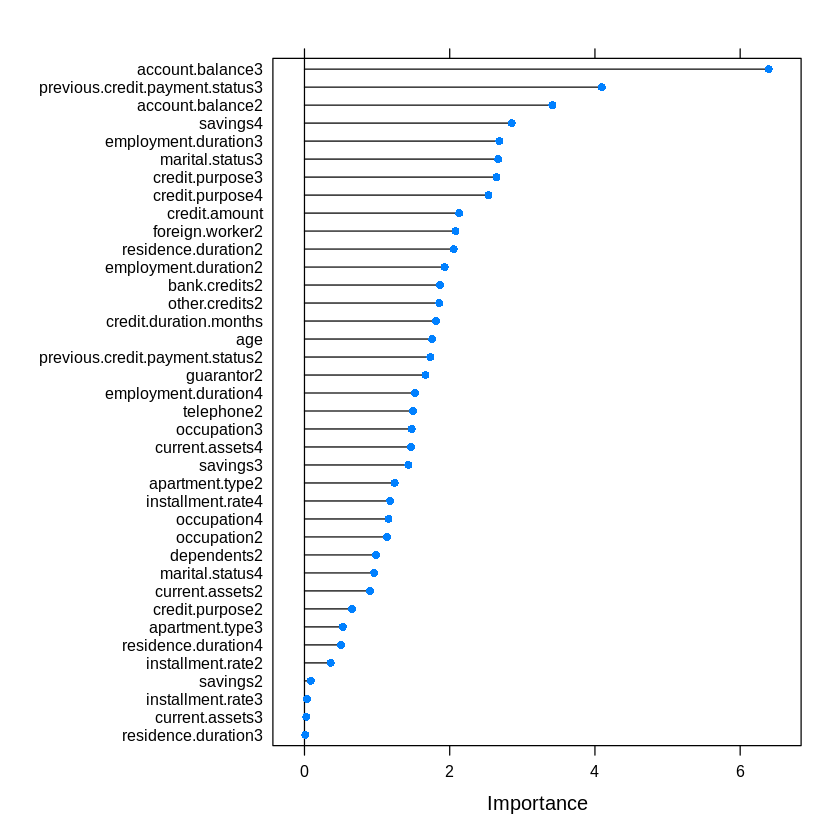

In [25]:
plot(importance)

In [26]:
# Construindo um novo modelo com as variáveis selecionadas
formula.new <- "credit.rating ~ account.balance + credit.purpose + previous.credit.payment.status + savings + credit.duration.months"
formula.new <- as.formula(formula.new)
modelo_v2 <- glm(formula = formula.new, data = train.data, family = "binomial")



In [27]:
summary(modelo_v2)


Call:
glm(formula = formula.new, family = "binomial", data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5681  -0.8251   0.4632   0.7589   1.9297  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -0.49392    0.49693  -0.994  0.32025    
account.balance2                 0.78031    0.25480   3.062  0.00220 ** 
account.balance3                 1.74127    0.25795   6.751 1.47e-11 ***
credit.purpose2                 -0.38992    0.44650  -0.873  0.38250    
credit.purpose3                 -1.00065    0.41577  -2.407  0.01610 *  
credit.purpose4                 -0.90256    0.41489  -2.175  0.02960 *  
previous.credit.payment.status2  0.88167    0.33474   2.634  0.00844 ** 
previous.credit.payment.status3  1.70355    0.36312   4.691 2.71e-06 ***
savings2                         0.01468    0.33773   0.043  0.96532    
savings3                         0.68978    0.39380   1.752  0.0798

In [28]:
# Prevendo e Avaliando o modelo
previsoes_new <- predict(modelo_v2, test.data, type = "response")
previsoes_new <- round(previsoes_new)



In [29]:
# Confusion Matrix
confusionMatrix(table(data = previsoes_new, reference = test.class.var), positive = '1')



Confusion Matrix and Statistics

    reference
data   0   1
   0  48  31
   1  74 247
                                        
               Accuracy : 0.7375        
                 95% CI : (0.6915, 0.78)
    No Information Rate : 0.695         
    P-Value [Acc > NIR] : 0.03522       
                                        
                  Kappa : 0.3129        
                                        
 Mcnemar's Test P-Value : 4.153e-05     
                                        
            Sensitivity : 0.8885        
            Specificity : 0.3934        
         Pos Pred Value : 0.7695        
         Neg Pred Value : 0.6076        
             Prevalence : 0.6950        
         Detection Rate : 0.6175        
   Detection Prevalence : 0.8025        
      Balanced Accuracy : 0.6410        
                                        
       'Positive' Class : 1             
                                        

## Avaliação da Performance do Modelo

In [30]:
# Plot do modelo com melhor acurácia
modelo_final <- modelo_v2
previsoes <- predict(modelo_final, test.feature.vars, type = "response")
previsoes_finais <- prediction(previsoes, test.class.var)

In [31]:
# Função para Plot ROC
plot.roc.curve <- function(predictions, title.text){
  perf <- performance(predictions, "tpr", "fpr")
  plot(perf,col = "black",lty = 1, lwd = 2,
       main = title.text, cex.main = 0.6, cex.lab = 0.8,xaxs = "i", yaxs = "i")
  abline(0,1, col = "red")
  auc <- performance(predictions,"auc")
  auc <- unlist(slot(auc, "y.values"))
  auc <- round(auc,2)
  legend(0.4,0.4,legend = c(paste0("AUC: ",auc)), cex = 0.6, bty = "n", box.col = "white")
 
}

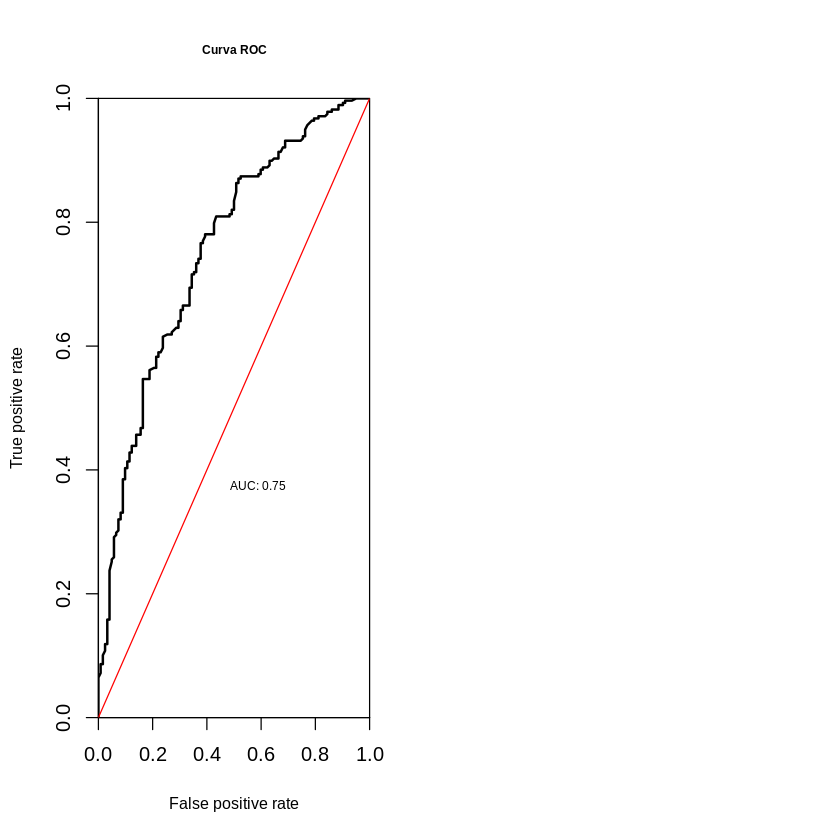

In [32]:
# Plot
par(mfrow = c(1, 2))
plot.roc.curve(previsoes_finais, title.text = "Curva ROC")

## Prevendo com novos dados

In [33]:
# Novos dados
account.balance <- c(1, 4, 3)
credit.purpose <- c(4, 2, 3)
previous.credit.payment.status <- c(3, 3, 2)
savings <- c(2, 3, 2)
credit.duration.months <- c(15, 12, 8)



In [34]:
# Cria um dataframe
novo_dataset <- data.frame(account.balance,
                           credit.purpose,
                           previous.credit.payment.status,
                           savings,
                          credit.duration.months)



In [35]:
View(novo_dataset)

account.balance,credit.purpose,previous.credit.payment.status,savings,credit.duration.months
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,3,2,15
4,2,3,3,12
3,3,2,2,8


In [36]:
# Separa variáveis explanatórias numéricas e categóricas
new.numeric.vars <- c("credit.duration.months")
new.categorical.vars <- c('account.balance', 'previous.credit.payment.status',
                          'credit.purpose', 'savings')



In [41]:
new.categorical.vars

[1] "account.balance"                "previous.credit.payment.status"
[3] "credit.purpose"                 "savings"

In [37]:
# Aplica as transformações
novo_dataset_final <- to.factors(df = novo_dataset, variables = new.categorical.vars)
str(novo_dataset_final)

'data.frame':	3 obs. of  5 variables:
 $ account.balance               : Factor w/ 3 levels "1","3","4": 1 3 2
 $ credit.purpose                : Factor w/ 3 levels "2","3","4": 3 1 2
 $ previous.credit.payment.status: Factor w/ 2 levels "2","3": 2 2 1
 $ savings                       : Factor w/ 2 levels "2","3": 1 2 1
 $ credit.duration.months        : num  15 12 8


In [38]:
novo_dataset_final <- scale.features(novo_dataset_final, new.numeric.vars)
str(novo_dataset_final)

'data.frame':	3 obs. of  5 variables:
 $ account.balance               : Factor w/ 3 levels "1","3","4": 1 3 2
 $ credit.purpose                : Factor w/ 3 levels "2","3","4": 3 1 2
 $ previous.credit.payment.status: Factor w/ 2 levels "2","3": 2 2 1
 $ savings                       : Factor w/ 2 levels "2","3": 1 2 1
 $ credit.duration.months        : num [1:3, 1] 0.9492 0.0949 -1.0441
  ..- attr(*, "scaled:center")= num 11.7
  ..- attr(*, "scaled:scale")= num 3.51


In [39]:
View(novo_dataset_final)

account.balance,credit.purpose,previous.credit.payment.status,savings,credit.duration.months
<fct>,<fct>,<fct>,<fct>,"<dbl[,1]>"
1,4,3,2,0.9491580
4,2,3,3,0.0949158
3,3,2,2,-1.0440738


In [42]:
novo_dataset_final$account.balance

[1] 1 4 3
Levels: 1 3 4

In [43]:
# Previsões
#previsao_novo_cliente <- predict(modelo_final, newdata = novo_dataset_final, type = "response")